# **<font color="blue">📊</font> <font color="#006400">DATA PREPARATION</font>**


<font color="#006400"><b> Data Collection</b></font>

---


 **Description**:
   - Gathered the data required for this project(done by SPE).
   - Collected the dataset and validation data from source provided by SPE.


<font color="#006400"><b> Data Upload</b></font>

---

**Description**
- Uploaded the collected datasets to my working environment.


In [1]:
from google.colab import files

def upload_multiple_files(num_files):
    uploaded_files = []
    for _ in range(num_files):
        uploaded = files.upload()
        if uploaded:
            uploaded_files.extend(list(uploaded.keys()))
        else:
            print("Upload canceled or failed.")
            break
    return uploaded_files

num_files_to_upload = 2

uploaded_files = upload_multiple_files(num_files_to_upload)

if len(uploaded_files) == num_files_to_upload:
    print(f"Uploaded files: {uploaded_files}")
else:
    print(f"Please upload exactly {num_files_to_upload} files.")


Saving dseats_2024_training_dataset.csv to dseats_2024_training_dataset (3).csv


Saving dseats_2024_validation_dataset.csv to dseats_2024_validation_dataset (3).csv
Uploaded files: ['dseats_2024_training_dataset (3).csv', 'dseats_2024_validation_dataset (3).csv']


<p>



<font color="#006400"><b>📚 Importing the Necessary Libraries</b></font>


---



In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from IPython.display import display, HTML


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [3]:
dataset=pd.read_csv('dseats_2024_training_dataset.csv')
dataset.head()

,PRODUCTION DATE,Field Name,WELL_BORE_CODE,N_WELL_BORE_CODE,WellBore Name,FLOW_KIND,WELL_TYPE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
0,07/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
1,08/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
2,09/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
3,10/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
4,11/04/2014 00:00,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.45403,370.02589,4020.53477,0.0,479.91926,33.07195,0.0,0.0,0.0


In [4]:
# Copying the dataset into the variable dh and printing the shape

dh=dataset.copy()
dh.shape

(6925, 16)

<p>

<font color="#006400"><b>📉 Statistical description of the dataset</b></font>

---

In [5]:
dh.describe()

,N_WELL_BORE_CODE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
count,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6925.000000,6919.000000,6925.000000,6.925000e+03,6925.000000
mean,107.297040,2587.482923,349.674794,2161.986343,180.369383,716.576882,21.864557,8494.774524,6.978690e+06,11480.559310
std,0.980161,1588.474034,46.240823,1053.875029,139.771514,347.859953,22.300691,8927.596731,7.100875e+06,11484.481008
min,105.000000,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2879.813600
25%,107.000000,0.000000,273.150000,896.612291,0.000000,476.539814,4.631982,1686.600600,1.434288e+06,80.323300
50%,107.000000,3378.397358,376.911370,2472.031527,213.091127,619.647824,14.301660,5479.470600,4.770461e+06,5529.413200
75%,108.000000,3664.905359,379.496193,2907.047474,300.356843,903.890487,31.529768,11730.472600,9.892230e+06,22261.505100
max,109.000000,4606.666675,381.652178,4592.612695,435.287508,1991.009935,125.718570,37122.573600,3.004494e+07,50444.164600


<font color="#006400" size="3.7"><u><b>Findings or Observations</b></u></font>


*   <font size="3"><b>The Water Production column has a minimum value of -2879.814, which is a problem because production rates can't be negative.</b></font>

* <font size="3"><b>The amount of oil, gas, and water produced varies widely, which is typical for production data.</b></font>

*   <font size="3"><b>The temperature readings from down the well are similar to the temperature in a normal room and are typical for oil production operations.</b></font>

*   <font  size="3"><b>The Choke Size column has slightly fewer entries (6919) compared to other columns (6925), indicating some missing data.</b></font>

<p>

<font color="#006400" size="4"><u><b>Data Cleaning</b></u></font>

<font  size="3"><b>Description:</b></font>


*   <font  size="3"><b>Checking for Null values which can also be seen from the statistical description and filling it with the mean since it is numerical data.</b></font>

* <font  size="3"><b>Remove the negative values in the Water production column</b></font>

In [6]:
#Checking for null values
dh.isnull().sum()

PRODUCTION DATE                  0
Field Name                       0
WELL_BORE_CODE                   0
N_WELL_BORE_CODE                 0
WellBore Name                    0
FLOW_KIND                        0
WELL_TYPE                        0
Downhole Pressure (PSI)          0
Downhole Temperature (Kelvin)    0
Average Tubing Pressure          0
Annulus Pressure (PSI)           0
AVG WHP (PSI)                    0
Choke Size                       6
Oil Production (stb/day)         0
Gas Volume (scf/day)             0
Water Production (stb/day)       0
dtype: int64

In [7]:
# There are 6 null values in the Choke Size column and I filled it with mean values
dh.fillna(dh['Choke Size'].mean(), inplace=True)

In [8]:
# Printing out all the columns in the dataset
print("Production data Columns:")
for column in dh.columns:
    print(column)

Production data Columns:
PRODUCTION DATE
Field Name
WELL_BORE_CODE
N_WELL_BORE_CODE
WellBore Name
FLOW_KIND
WELL_TYPE
Downhole Pressure (PSI)
Downhole Temperature (Kelvin)
Average Tubing Pressure
Annulus Pressure (PSI)
AVG WHP (PSI)
Choke Size
Oil Production (stb/day)
Gas Volume (scf/day)
Water Production (stb/day)


In [9]:
# Printing all the negative values in the Water Production column
Water_prod_negative_values = dh[dh['Water Production (stb/day)'] < 0][['Water Production (stb/day)']]

print("Water Production with negative values:")
print(Water_prod_negative_values)

Water Production with negative values:
      Water Production (stb/day)
1241                    -89.2551
2761                  -2879.8136
4164                     -5.9755
5372                   -372.3051


In [10]:
# Removing the negative values and assigning it to a dataframe df
df = dh[dh['Water Production (stb/day)'] >= 0]

In [11]:
# Printing out the shape after the removal
df.shape

(6921, 16)

<p>

<font color="#006400" size="3"><b>Statistical description of the dataset after cleaning</b></font>

---



In [12]:
df.describe()

,N_WELL_BORE_CODE,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
count,6921.000000,6921.000000,6921.000000,6921.000000,6921.000000,6921.000000,6921.000000,6921.000000,6.921000e+03,6921.000000
mean,107.296922,2587.336366,349.673780,2161.989939,180.397904,716.381468,21.852984,8492.495121,6.977347e+06,11487.678164
std,0.980358,1588.430434,46.241387,1053.982005,139.793766,347.760514,22.285476,8926.115423,7.099155e+06,11483.944400
min,105.000000,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,107.000000,0.000000,273.150000,896.612291,0.000000,476.492176,4.632808,1686.600600,1.434691e+06,81.455500
50%,107.000000,3378.304029,376.911370,2472.238841,213.103240,619.496716,14.311022,5479.470600,4.770461e+06,5533.313000
75%,108.000000,3664.847417,379.496639,2907.047474,300.358727,903.153193,31.515180,11729.969400,9.890565e+06,22269.430500
max,109.000000,4606.666675,381.652178,4592.612695,435.287508,1991.009935,125.718570,37122.573600,3.004494e+07,50444.164600


<font color="#006400" size="3"><b>Findings:
</b></font>


*   <font  size="3"><b>We can see that the minimum value for water production is no longer negative but 0.
</b></font>

*   <font size="3"><b>The count is not 6921 from 6925
</b></font>

<p>

<font color="#006400" size="3"><b>Checking for duplicates and there is no duplicates
</b></font>

In [13]:
duplicates = df.duplicated()

num_duplicates = duplicates.sum()

print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


<p>

<font color="#006400" size="3"><b>Checking the data types of the columns
</b></font>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6921 entries, 0 to 6924
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   PRODUCTION DATE                6921 non-null   object 
 1   Field Name                     6921 non-null   object 
 2   WELL_BORE_CODE                 6921 non-null   object 
 3   N_WELL_BORE_CODE               6921 non-null   int64  
 4   WellBore Name                  6921 non-null   object 
 5   FLOW_KIND                      6921 non-null   object 
 6   WELL_TYPE                      6921 non-null   object 
 7   Downhole Pressure (PSI)        6921 non-null   float64
 8   Downhole Temperature (Kelvin)  6921 non-null   float64
 9   Average Tubing Pressure        6921 non-null   float64
 10  Annulus Pressure (PSI)         6921 non-null   float64
 11  AVG WHP (PSI)                  6921 non-null   float64
 12  Choke Size                     6921 non-null   float6

<font color="#006400" size="3"><b>Findings:
</b></font>

*   <font  size="3"><b>All the columns have the appropriate data types and there is nothing to change
</b></font>

<p>

In [15]:
# Shuffled the data because some parts have more 0s and some more positive data so that both our training and testing data will have a mix of all valuesb
df=df.sample(frac=1)

<p>

# **<font color="blue">📈</font> <font color="#006400">EXPLORATORY DATA ANALYSIS</font>**


In [16]:
# Removing the columns that I won't be needing to build the model

drop_these_columns = ['PRODUCTION DATE', 'Field Name', 'WELL_BORE_CODE', 'N_WELL_BORE_CODE', 'WellBore Name', 'FLOW_KIND', 'WELL_TYPE']
df = df.drop(columns=drop_these_columns)

print(df.columns)

Index(['Downhole Pressure (PSI)', 'Downhole Temperature (Kelvin)',
       'Average Tubing Pressure', 'Annulus Pressure (PSI)', 'AVG WHP (PSI)',
       'Choke Size', 'Oil Production (stb/day)', 'Gas Volume (scf/day)',
       'Water Production (stb/day)'],
      dtype='object')


<font color="#006400" size="3"><b>Pairwise relationships:
</b></font>

<font color="#006400" size="3"><b>This pairwise plot, created using sns.pairplot(df), visualizes the relationships between each pair of columns in the dataset
</b></font>

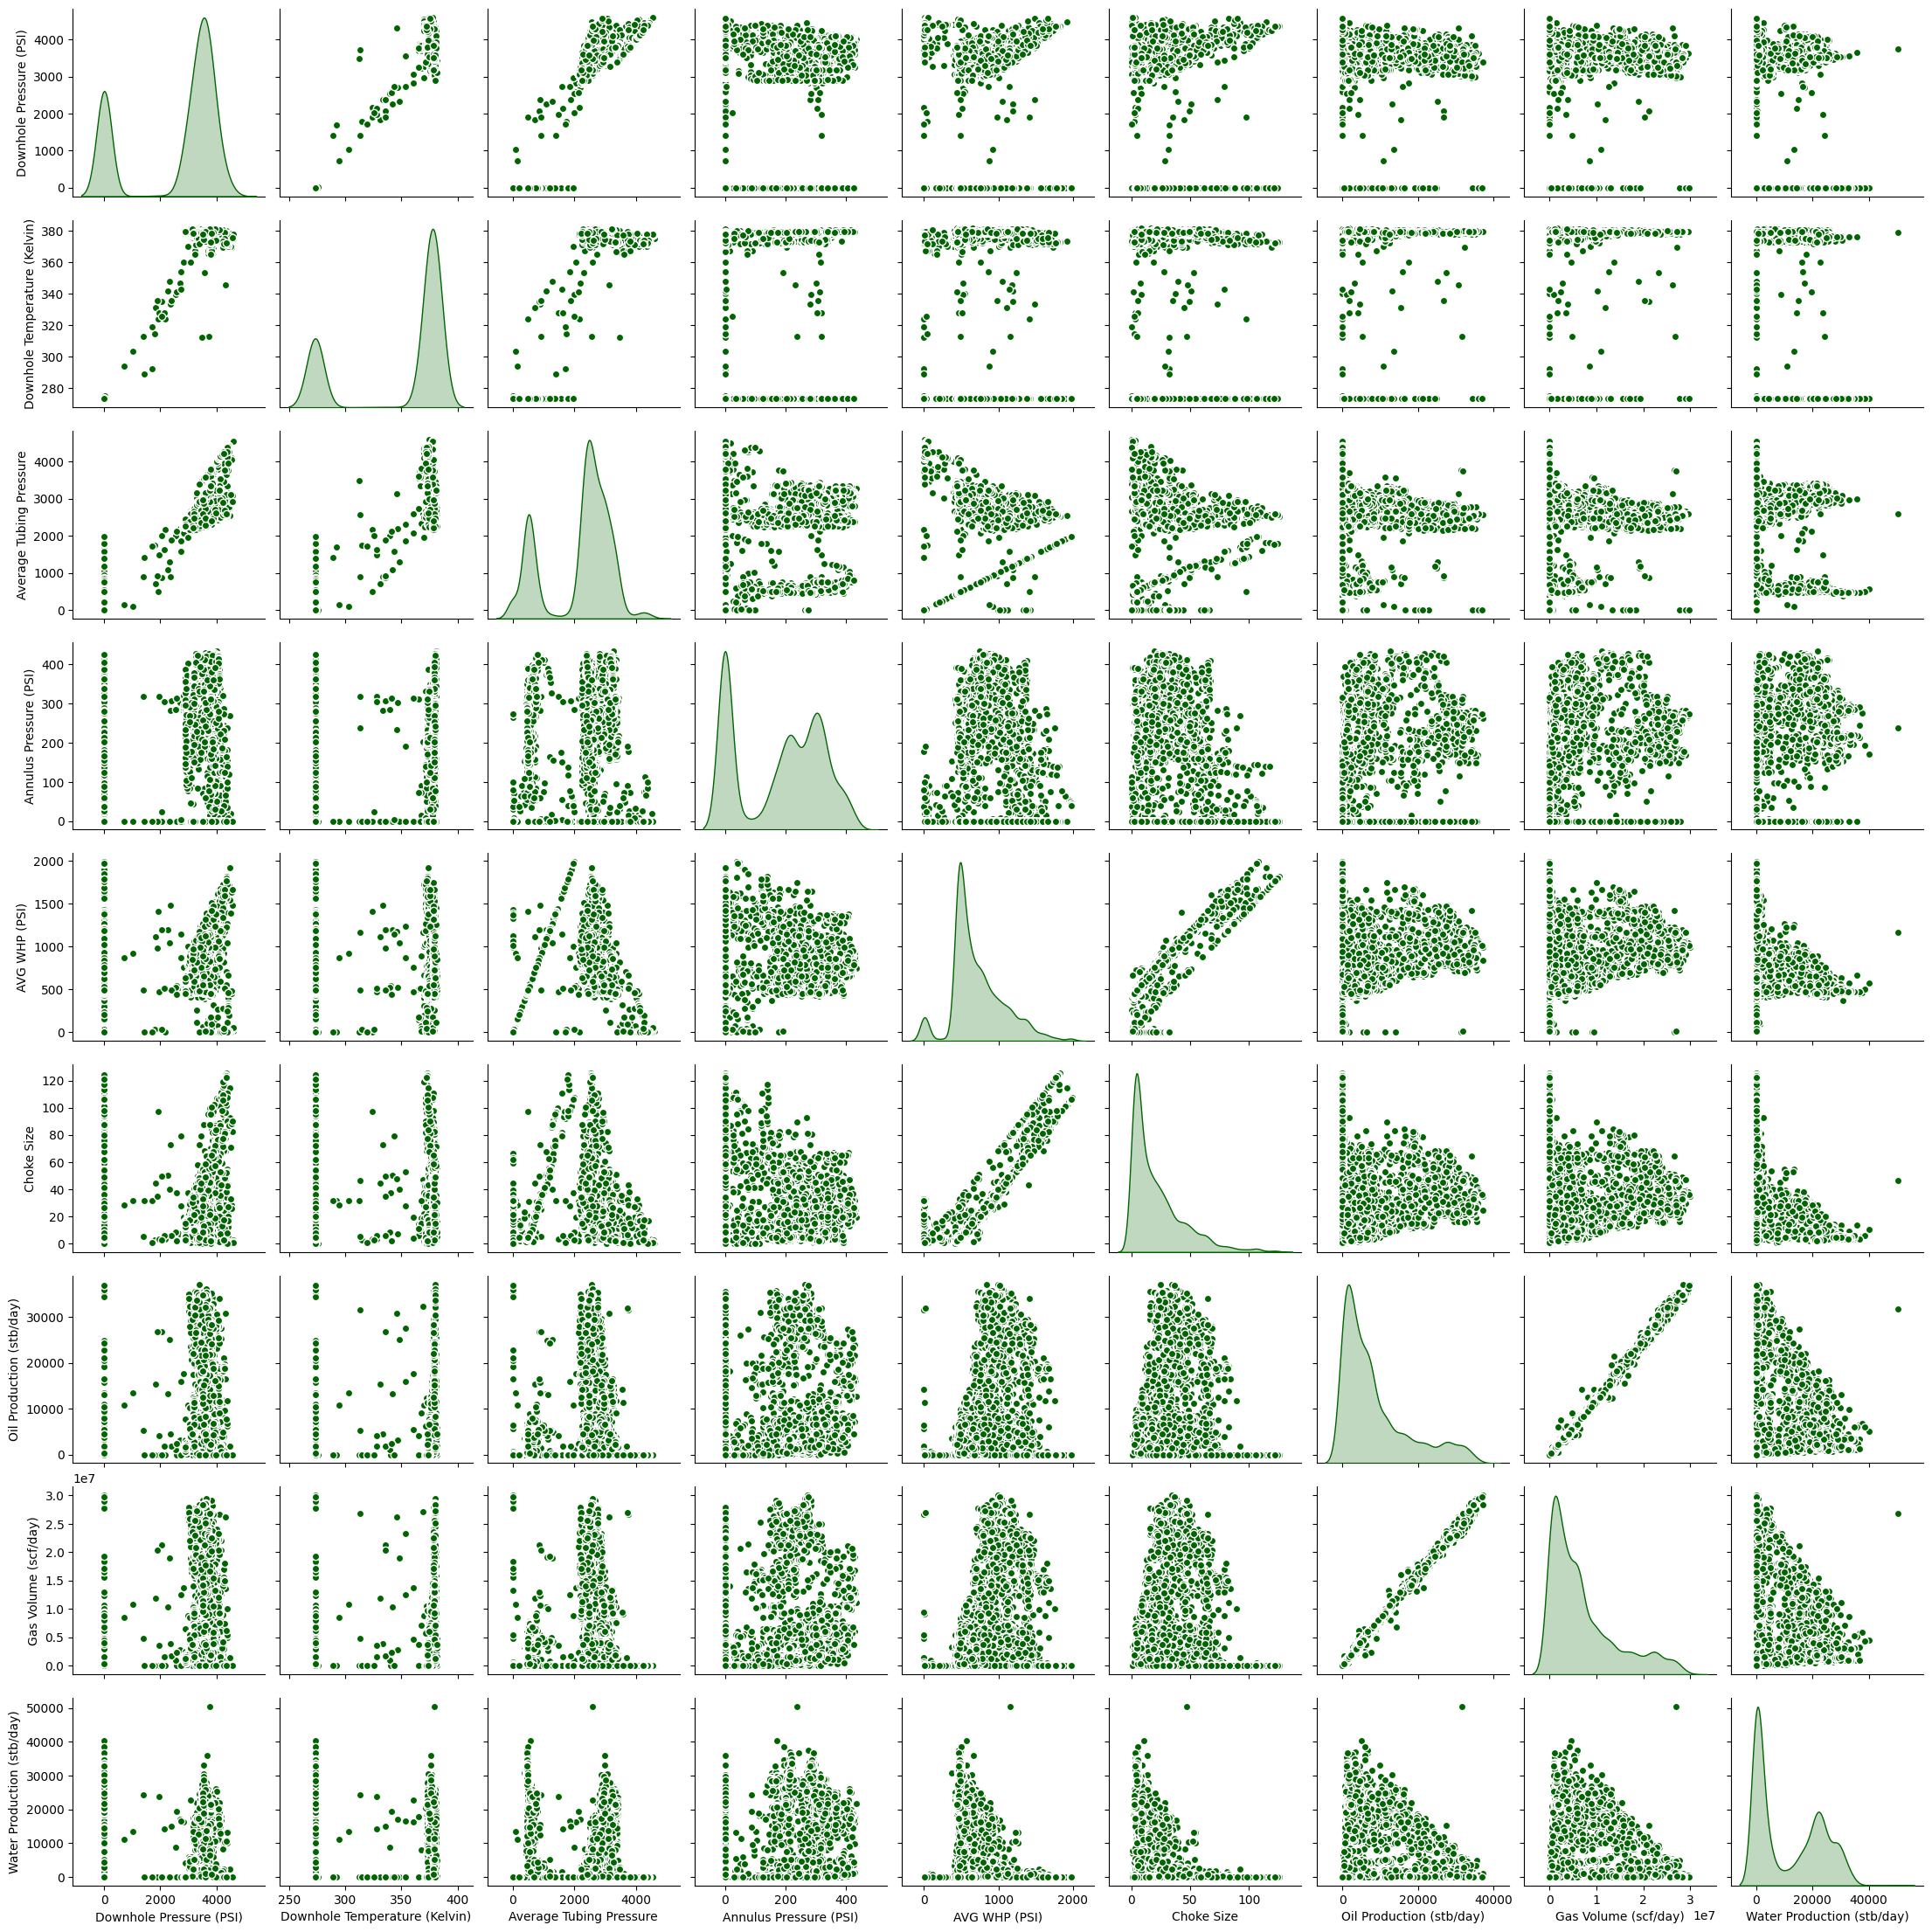

In [17]:
sns.pairplot(df,
             plot_kws=dict(marker='o', linewidth=1, color='#006400'),
             diag_kws=dict(color='#006400'),
             diag_kind='kde')

<p>

<font color="#006400" size="3"><b>Correlation Matrix:
</b></font>

<font color="#006400" size="3"><b>
This correlation matrix shows the pairwise correlations between each variable in the dataset.
The values range from -1 (strong negative correlation) to 1 (strong positive correlation).</b></font>

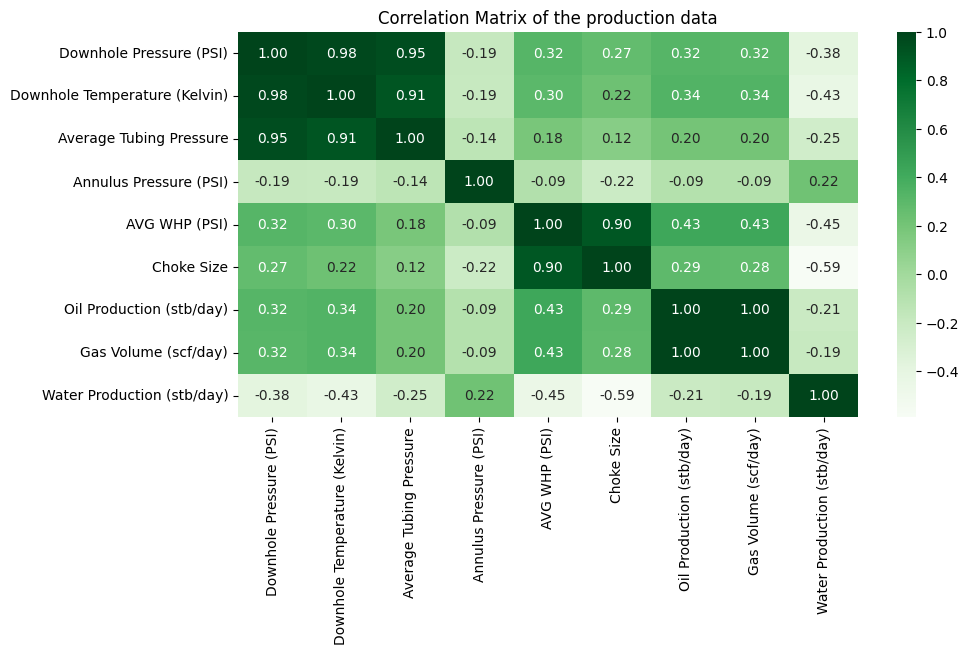

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(),annot=True, cmap='Greens', fmt=".2f") #mask=mask
plt.title('Correlation Matrix of the production data')
plt.show()

<font color="#006400" size="3.7"><u><b>Findings or Observations</b></u></font>


*   <font  size="3"><b>Downhole Pressure and Downhole Temperature have a strong positive correlation of 0.98, indicating that as Downhole Pressure increases, Downhole Temperature also increases.</b></font>

*   <font size="3"><b>Downhole Pressure and Average Tubing Pressure have a strong positive correlation of 0.95, suggesting that as Downhole Pressure increases, Average Tubing Pressure also tends to increase.</b></font>

*  <font  size="3"><b>Downhole Temperature and Average Tubing Pressure have a strong positive correlation of 0.91, indicating that as Downhole Temperature increases, Average Tubing Pressure also tends to increase.</b></font>

*   <font  size="3"><b>AVG WHIP and Choke size have a strong positive correlation of 0.90, suggesting that as AVG WHIP increases, Choke size also tends to increase.</b></font>

*   <font size="3"><b>The others showed moderate,weak negative and positive correlations.</b></font>

<p>

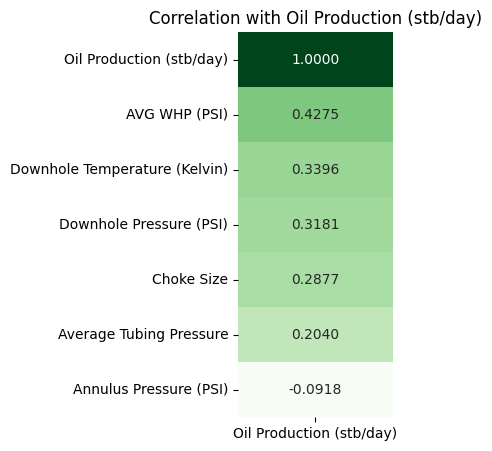

In [19]:
# This plot shows the relationship between the features and one of the output 'Oil Production (stb/day)'
correlation_matrix = df.drop(columns=['Gas Volume (scf/day)', 'Water Production (stb/day)']).corr()

oil_production_corr = correlation_matrix[['Oil Production (stb/day)']].sort_values(by='Oil Production (stb/day)', ascending=False)

plt.figure(figsize=(2, 5))

sns.heatmap(oil_production_corr, annot=True, cmap='Greens', fmt=".4f", cbar=False)

plt.title('Correlation with Oil Production (stb/day)')

plt.show()


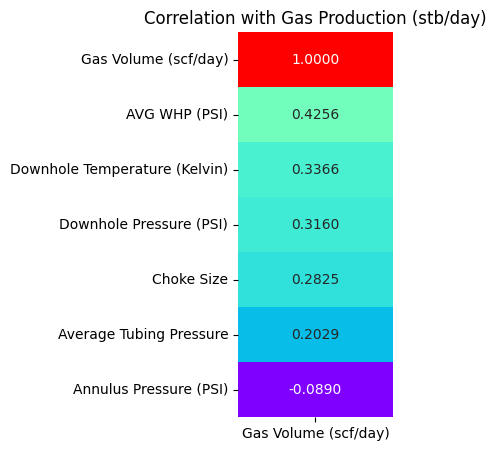

In [20]:
# This plot shows the relationship between the features and one of the output 'Gas Volume (scf/day)'
correlation_matrix = df.drop(columns=['Oil Production (stb/day)', 'Water Production (stb/day)']).corr()

gas_production_corr = correlation_matrix[['Gas Volume (scf/day)']].sort_values(by='Gas Volume (scf/day)', ascending=False)

plt.figure(figsize=(2, 5))
sns.heatmap(gas_production_corr, annot=True, cmap='rainbow', fmt=".4f", cbar=False)
plt.title('Correlation with Gas Production (stb/day)')
plt.show()

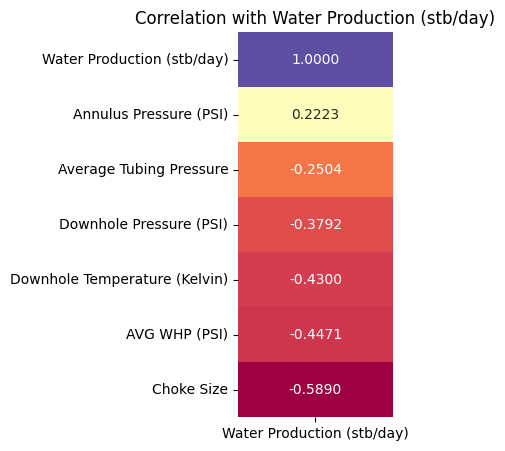

In [21]:
# This plot shows the relationship between the features and one of the output 'Gas Volume (scf/day)'

correlation_matrix = df.drop(columns=['Oil Production (stb/day)', 'Gas Volume (scf/day)']).corr()
water_production_corr = correlation_matrix[['Water Production (stb/day)']].sort_values(by='Water Production (stb/day)', ascending=False)

plt.figure(figsize=(2, 5))
sns.heatmap(water_production_corr, annot=True, cmap='Spectral', fmt=".4f", cbar=False)
plt.title('Correlation with Water Production (stb/day)')
plt.show()

<font color="#006400" size="3"><b>Checking for outliers in the input features and removing them
</b></font>

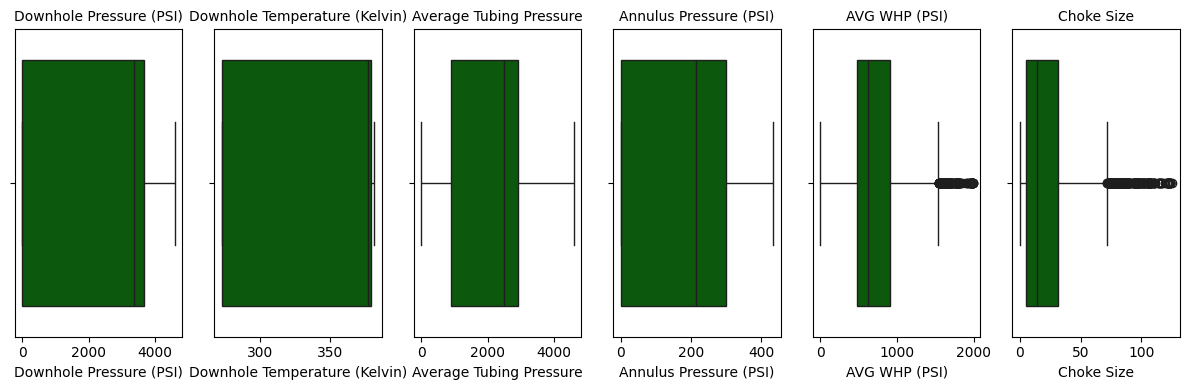

In [22]:
figure, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, figsize=(12, 4))

sns.boxplot(ax=ax1, x=df['Downhole Pressure (PSI)'], data=df, color='darkgreen')
ax1.set_title('Downhole Pressure (PSI)', fontsize=10, loc='center')

sns.boxplot(ax=ax2, x=df['Downhole Temperature (Kelvin)'], data=df,color='darkgreen')
ax2.set_title('Downhole Temperature (Kelvin)', fontsize=10, loc='center')

sns.boxplot(ax=ax3, x=df['Average Tubing Pressure'], data=df, color='darkgreen')
ax3.set_title('Average Tubing Pressure', fontsize=10, loc='center')

sns.boxplot(ax=ax4, x=df['Annulus Pressure (PSI)'], data=df, color='darkgreen')
ax4.set_title('Annulus Pressure (PSI)', fontsize=10, loc='center')

sns.boxplot(ax=ax5, x=df['AVG WHP (PSI)'], data=df, color='darkgreen')
ax5.set_title('AVG WHP (PSI)', fontsize=10, loc='center')

sns.boxplot(ax=ax6, x=df['Choke Size'], data=df, color='darkgreen')
ax6.set_title('Choke Size', fontsize=10, loc='center')

plt.tight_layout()
plt.show()

In [23]:
# Removing the outliers in AVG WHP and Choke Size

df['AVG WHP (PSI)']=df['AVG WHP (PSI)'].clip(lower=df['AVG WHP (PSI)'].quantile(0.05),upper=df['AVG WHP (PSI)'].quantile(0.95))
df['Choke Size']=df['Choke Size'].clip(lower=df['Choke Size'].quantile(0.05),upper=df['Choke Size'].quantile(0.95))

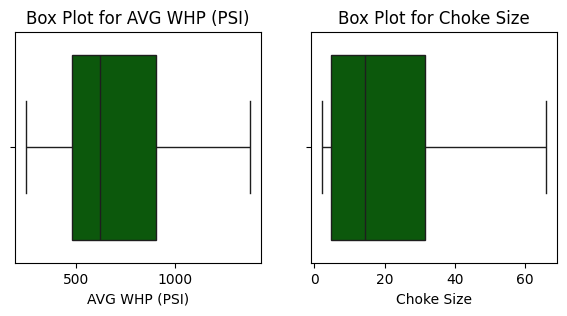

In [24]:
# Checking if the outliers has been removed

figure, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

sns.boxplot(ax=ax1, x=df['AVG WHP (PSI)'], data=df, color='darkgreen')
ax1.set_title('Box Plot for AVG WHP (PSI)')

sns.boxplot(ax=ax2, x=df['Choke Size'], data=df, color='darkgreen')
ax2.set_title('Box Plot for Choke Size')

plt.show()

<p>

# **<font color="blue">📈</font> <font color="#006400">FEATURE ENGINEERING</font>**


<font color="#006400" size="3"><b>Due to the large values in the target variables, I adjusted the units for better analysis or modeling by multiplying by 10^-6.
</b></font>

In [25]:
df['Oil Production (stb/day)'] = df['Oil Production (stb/day)'] * 10**-6
df['Gas Volume (scf/day)'] = df['Gas Volume (scf/day)'] * 10**-6
df['Water Production (stb/day)'] = df['Water Production (stb/day)'] * 10**-6


In [26]:
df.head(3)

,Downhole Pressure (PSI),Downhole Temperature (Kelvin),Average Tubing Pressure,Annulus Pressure (PSI),AVG WHP (PSI),Choke Size,Oil Production (stb/day),Gas Volume (scf/day),Water Production (stb/day)
5246,3200.632669,376.764406,2700.536354,0.000000,500.096315,3.186428,0.008031,6.919473,0.015039
3746,0.000000,273.150000,660.797054,378.439464,660.797054,16.664510,0.003311,2.721215,0.005142
1150,3192.280028,379.005014,2494.545200,272.131559,697.734828,19.546781,0.010166,8.302818,0.004892


In [27]:
x = df.drop(columns=['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)'])

y = df[['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)']]

In [28]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_poly = poly.fit_transform(x)
x_poly_df = pd.DataFrame(x_poly, columns=poly.get_feature_names_out(x.columns))
x_combined = pd.concat([x.reset_index(drop=True), x_poly_df.reset_index(drop=True)], axis=1)

<font color="#006400" size="4"><u><b>Data Modelling</b></u></font>

<font color="#006400" size="3"><b>Description:</b></font>


*   <font  size="3"><b>Splitting the data into input and output features and training and testing sets using the 80:20 split.</b></font>

* <font  size="3"><b>Applied polynomial features to the input features to capture non-linear relationships between the variables and complex relationships and interactions within the data, thereby improving its predictive power and accuracy.</b></font>

* <font  size="3"><b>Transformed the scale of the input features.</b></font>

* <font  size="3"><b>In order to assess the performance of the model across multiple subsets of the data, I applied cross validation.</b></font>

* <font  size="3"><b>Built different Machine learning algorithms and applied hyperparameter tuning and also manually(trial and error).</b></font>

* <font  size="3"><b>Compared the Actual and Predicted values of each the models built.</b></font>

* <font  size="3"><b>Evaluated the models using Root-mean squared error, Mean absolute error and R2- score metrics respectively.</b></font>



In [29]:
# Splitting the data
xtrain, xtest, ytrain, ytest = train_test_split(x_combined, y, test_size=0.2, random_state=42)

In [30]:
#Scaling the data using StandardScaler
scaler= StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.fit_transform(xtest)

<font color="#006400" size="4"><u><b>Model Building</b></u></font>

<font color="#006400" size="3"><b>Machine learning algorithms used:</b></font>


*   <font  size="3"><b>Linear Regression</b></font>

* <font  size="3"><b>K-Nearest Neighbours Regressor </b></font>

* <font  size="3"><b>Decision Trees Regressor </b></font>

* <font  size="3"><b>Random Forest Regressor</b></font>

* <font  size="3"><b>Gradient boosting Regressor</b></font>

* <font  size="3"><b>Artificial Neural Networks</b></font>


<font color="#006400" size="4"><u><i><b>1. Linear Regression Model</b></i></u></font>


In [31]:
# Using Linear Regression

model_linear_reg=LinearRegression()

model_linear_reg.fit(xtrain, ytrain)

LinearRegression()

In [32]:
model_linear_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [33]:
predictions_linear_reg=model_linear_reg.predict(xtest)
prediction_train_linear_reg=model_linear_reg.predict(xtrain)

In [34]:
print(f'The Accuracy for the testing set is : ',model_linear_reg.score(xtest,ytest))
print(f'The Accuracy for the training set is : ',model_linear_reg.score(xtrain,ytrain))

The Accuracy for the testing set is :  0.7418325816949901
The Accuracy for the training set is :  0.723950880813169


<font color="#006400" size="3"><b>Note:

Since the accuracies are reasonably close, it indicates that the model is performing fairly well and is not heavily overfitting or underfitting.</b></font>

In [35]:
# Evaluating the model
rmse_linear_reg= np.sqrt(mean_squared_error(ytest, predictions_linear_reg))
mae_linear_reg= mean_absolute_error(ytest, predictions_linear_reg)
r2_linear_reg= r2_score(ytest, predictions_linear_reg)

# Print the results
print(f'RMSE_linear_reg: {rmse_linear_reg:.4f}')
print(f'MAE_linear_reg: {mae_linear_reg:.4f}')
print(f'R²_linear_reg: {r2_linear_reg:.4f}')

RMSE_linear_reg: 2.2215
MAE_linear_reg: 0.8834
R²_linear_reg: 0.7418


In [36]:
# Applying cross validation

scores = cross_val_score(model_linear_reg, xtrain, ytrain, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))

Cross-Validation Scores: [0.73690934 0.7431852  0.65904643 0.71229    0.69912388]
Mean CV Score: 0.7101109687152198


<font color="#006400" size="3"><b>Note:

The output shows that the model's performance varies across the 5 folds, with a mean accuracy of approximately 0.72. This suggests that the model is performing reasonably well but can still be improved.
</b></font>

In [37]:
# Applying Grid Search to check for the best parameters
linear_reg_parameters = {'copy_X': [True, False],'fit_intercept': [True, False],'n_jobs': [None, 1, -1],'positive': [True, False]}

linear = LinearRegression()
grid_search = GridSearchCV(estimator=linear, param_grid=linear_reg_parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(xtrain, ytrain)
best_linear = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

y_pred = best_linear.predict(xtest)
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)


y_pred *= 1e6
print("Overall Metrics:")
print("RMSE: ", rmse)
print("MAE: ", mae)
print("R² Score: ", r2)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best parameters found:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Overall Metrics:
RMSE:  2.2215432427514097
MAE:  0.8833674228107938
R² Score:  0.7418325816949901


<font color="#006400" size="3"><b>Note:

The best parameters recommended by Grid search has been used intially to build the model.
</b></font>

In [38]:
predictions_linear_reg_df = pd.DataFrame(predictions_linear_reg, columns=['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)'])

predictions_linear_reg_reset = predictions_linear_reg_df.reset_index(drop=True)

ytest_reset = ytest.reset_index(drop=True)

ytest_scaled = ytest_reset * 10**6
predictions_scaled = predictions_linear_reg_reset * 10**6

Linear_Regression_df = pd.DataFrame({
    'Actual Oil Production (stb/day)': ytest_scaled['Oil Production (stb/day)'],
    'Predicted Oil Production (stb/day)': predictions_scaled['Oil Production (stb/day)'],
    'Actual Gas Volume (scf/day)': ytest_scaled['Gas Volume (scf/day)'],
    'Predicted Gas Volume (scf/day)': predictions_scaled['Gas Volume (scf/day)'],
    'Actual Water Production (stb/day)': ytest_scaled['Water Production (stb/day)'],
    'Predicted Water Production (stb/day)': predictions_scaled['Water Production (stb/day)']
})

title_html = "<h2>Actual and Predicted Values of the Linear Regression Model</h2>"
display(HTML(title_html))
display(Linear_Regression_df.head())

,Actual Oil Production (stb/day),Predicted Oil Production (stb/day),Actual Gas Volume (scf/day),Predicted Gas Volume (scf/day),Actual Water Production (stb/day),Predicted Water Production (stb/day)
0,0.0000,1692.478874,0.000,1.425526e+06,0.0000,6246.476328
1,6152.1861,3626.006990,5343054.243,3.166888e+06,21149.9992,20401.430388
2,2773.6384,1876.903566,2285468.142,1.688575e+06,21593.1926,23049.574858
3,7373.0751,10304.830083,6357306.198,8.530366e+06,929.5991,986.273184
4,7630.4619,10192.431255,6589753.168,8.471928e+06,1010.0482,635.823657


In [39]:
# Importing the validation data
validation_data = pd.read_csv('dseats_2024_validation_dataset.csv')
validation_data.head(5)

# Seperating the features and target variables
xval = validation_data.iloc[:, :-3]
yval = validation_data.iloc[:, -3:]

In [40]:
xval.drop(columns=['PRODUCTION DATE','Field Name','WELL_BORE_CODE',
                    'N_WELL_BORE_CODE','WellBore Name','FLOW_KIND','WELL_TYPE'],
                    inplace=True)
xval.isnull().sum()
xval.dropna(inplace=True)

In [41]:
poly = PolynomialFeatures(degree=2, include_bias=False)
poly.fit(xval)
xval_poly = poly.transform(xval)

scaler = StandardScaler()
xval_scaled = scaler.fit_transform(xval_poly)

yval_pred_ln = model_linear_reg.predict(xval_scaled)
yval_pred_ln *= 1e6

In [42]:

results_val = pd.DataFrame({
    'Predicted Oil Production': yval_pred_ln[:, 0],
    'Predicted Gas Volume': yval_pred_ln[:, 1],
    'Predicted Water Production': yval_pred_ln[:, 2]
})
print(results_val.head())


   Predicted Oil Production  Predicted Gas Volume  Predicted Water Production
0              2.809219e+15          2.577706e+18                7.938849e+15
1              2.247609e+15          2.062379e+18                6.351739e+15
2              1.960336e+15          1.798781e+18                5.539905e+15
3              1.705464e+15          1.564913e+18                4.819638e+15
4              1.473847e+15          1.352384e+18                4.165089e+15


<p>

<font color="#006400" size="4"><u><i><b>2. K-Nearest Neighbours Model</b></i></u></font>


In [43]:
# Using K-Nearest Neighbours

model_knn = KNeighborsRegressor(algorithm= 'auto', leaf_size= 40,
                                metric= 'minkowski', metric_params= None,
                                n_jobs= None, n_neighbors= 3, p= 1, weights='distance')
model_knn.fit(xtrain, ytrain)

KNeighborsRegressor(leaf_size=40, n_neighbors=3, p=1, weights='distance')

In [44]:
model_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 40,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

In [45]:
predictions_knn=model_knn.predict(xtest)
prediction_train_knn=model_knn.predict(xtrain)

In [46]:
print(f'The Accuracy for the testing set is : ',model_knn.score(xtest,ytest))
print(f'The Accuracy for the training set is : ',model_knn.score(xtrain,ytrain))

The Accuracy for the testing set is :  0.9216028397461704
The Accuracy for the training set is :  0.9999389972699907


<font color="#006400" size="3"><b>Note:
The model shows very high accuracy on the training set, indicating possible overfitting, while the testing set accuracy suggests it generalizes well but could be improved.</b></font>

In [47]:
# Evaluating the model

rmse_knn= np.sqrt(mean_squared_error(ytest, predictions_knn))
mae_knn= mean_absolute_error(ytest, predictions_knn)
r2_knn= r2_score(ytest, predictions_knn)

# Print the results
print(f'RMSE_KNN: {rmse_knn:.4f}')
print(f'MAE_KNN: {mae_knn:.4f}')
print(f'R²_KNN: {r2_knn:.4f}')

RMSE_KNN: 1.2182
MAE_KNN: 0.2906
R²_KNN: 0.9216


In [48]:
# Applying cross validation on the knn model

scores = cross_val_score(model_knn, xtrain, ytrain, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))

Cross-Validation Scores: [0.88706848 0.90083879 0.89883577 0.8869124  0.89463488]
Mean CV Score: 0.8936580647859017


In [ ]:
# Applying hyperparameter tuning using grid search cv
#knn_parameters = {
#    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
#    'weights': ['uniform', 'distance'],
#    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 #   'leaf_size': [10, 20, 30, 40, 50],
#    'p': [1, 2]
#}

#knn = KNeighborsRegressor()
#grid_search_knn = GridSearchCV(estimator=knn, param_grid=knn_parameters, cv=5, scoring='neg_mean_squared_error')
#grid_search_knn.fit(xtrain, ytrain)

#best_knn = grid_search_knn.best_estimator_
#print("Best parameters found: ", grid_search_knn.best_params_)

#y_pred_knn = best_knn.predict(xtest)

#rmse_knn = np.sqrt(mean_squared_error(ytest, y_pred_knn))
#mae_knn = mean_absolute_error(ytest, y_pred_knn)
#r2_knn = r2_score(ytest, y_pred_knn)
#y_pred_knn *= 1e6

#print("Overall Metrics for KNN:")
#print("RMSE: ", rmse_knn)
#print("MAE: ", mae_knn)
#print("R² Score: ", r2_knn)


In [50]:
predictions_knn_df = pd.DataFrame(predictions_knn, columns=['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)'])

predictions_knn_reset = predictions_knn_df.reset_index(drop=True)

ytest_reset = ytest.reset_index(drop=True)

ytest_scaled = ytest_reset * 10**6
predictions_scaled = predictions_knn_reset * 10**6

KNearestNeighbours_df = pd.DataFrame({
    'Actual Oil Production (stb/day)': ytest_scaled['Oil Production (stb/day)'],
    'Predicted Oil Production (stb/day)': predictions_scaled['Oil Production (stb/day)'],
    'Actual Gas Volume (scf/day)': ytest_scaled['Gas Volume (scf/day)'],
    'Predicted Gas Volume (scf/day)': predictions_scaled['Gas Volume (scf/day)'],
    'Actual Water Production (stb/day)': ytest_scaled['Water Production (stb/day)'],
    'Predicted Water Production (stb/day)': predictions_scaled['Water Production (stb/day)']
})

title_html = "<h2>Actual and Predicted Values of the K-Nearest Neighbours Model</h2>"
display(HTML(title_html))
display(KNearestNeighbours_df.head())

,Actual Oil Production (stb/day),Predicted Oil Production (stb/day),Actual Gas Volume (scf/day),Predicted Gas Volume (scf/day),Actual Water Production (stb/day),Predicted Water Production (stb/day)
0,0.0000,0.000000,0.000,0.000000e+00,0.0000,0.000000
1,6152.1861,5975.163602,5343054.243,5.342926e+06,21149.9992,21125.734351
2,2773.6384,2090.485585,2285468.142,1.832809e+06,21593.1926,21510.753487
3,7373.0751,7446.844481,6357306.198,6.379501e+06,929.5991,795.702078
4,7630.4619,7715.536774,6589753.168,6.721420e+06,1010.0482,1034.729013


In [51]:
yval_pred = model_knn.predict(xval_scaled)
yval_pred *= 1e6

results_val_knn = pd.DataFrame({
    'Predicted Oil Production (stb/day)': yval_pred[:, 0],
    'Predicted Gas Volume (scf/day)': yval_pred[:, 1],
    'Predicted Water Production (stb/day)': yval_pred[:, 2]
})
print(results_val_knn.head())


   Predicted Oil Production (stb/day)  Predicted Gas Volume (scf/day)  \
0                         3188.868946                    2.666999e+06   
1                        28051.997287                    2.290966e+07   
2                        24513.971712                    1.964665e+07   
3                        13250.102490                    1.059815e+07   
4                        21089.057297                    1.716508e+07   

   Predicted Water Production (stb/day)  
0                           1866.738796  
1                            757.453405  
2                            965.810749  
3                            500.279607  
4                             14.460491  


In [52]:
results_val_knn

,Predicted Oil Production (stb/day),Predicted Gas Volume (scf/day),Predicted Water Production (stb/day)
0,3188.868946,2.666999e+06,1866.738796
1,28051.997287,2.290966e+07,757.453405
2,24513.971712,1.964665e+07,965.810749
3,13250.102490,1.059815e+07,500.279607
4,21089.057297,1.716508e+07,14.460491
...,...,...,...
2070,0.000000,0.000000e+00,0.000000
2071,0.000000,0.000000e+00,0.000000
2072,0.000000,0.000000e+00,0.000000
2073,0.000000,0.000000e+00,0.000000


In [53]:
results_val_knn.to_csv('results_val_knn.csv', index=False, header=True)
#files.download('results_val_knn.csv')

<p>

<font color="#006400" size="4"><u><i><b>3. Decision Tree Model</b></i></u></font>

In [54]:
dt = DecisionTreeRegressor(criterion='squared_error', max_depth=None, min_samples_split=10,
                           min_samples_leaf=10, max_features=1.0, ccp_alpha=0.1,
                           max_leaf_nodes=100,splitter='random')

dt.fit(xtrain,ytrain).get_params()

{'ccp_alpha': 0.1,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': 100,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'random'}

In [55]:
predictions_dt=dt.predict(xtest)
predt_dt=dt.predict(xtrain)

In [56]:
print(f'The Accuracy for the testing set is : ',dt.score(xtest,ytest))
print(f'The Accuracy for the training set is : ',dt.score(xtrain,ytrain))

The Accuracy for the testing set is :  0.6130620265514498
The Accuracy for the training set is :  0.6104238837378327


In [57]:
rmse_dt= np.sqrt(mean_squared_error(ytest, predictions_dt))
mae_dt= mean_absolute_error(ytest, predictions_dt)
r2_dt= r2_score(ytest, predictions_dt)

# Print the results
print(f'RMSE_DT: {rmse_dt:.4f}')
print(f'MAE_DT: {mae_dt:.4f}')
print(f'R²_DT: {r2_dt:.4f}')

RMSE_DT: 2.1574
MAE_DT: 0.8721
R²_DT: 0.6131


In [58]:
# Applying cross validation on the Decision Tree model

scores = cross_val_score(dt, xtrain, ytrain, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))

Cross-Validation Scores: [0.6121372  0.59324742 0.57551709 0.60378758 0.6013704 ]
Mean CV Score: 0.5972119385229774


In [59]:
# Applying hyperparameter tuning to the Decision Tree Model
# dt_parameters = {
#     'criterion': ['poisson', 'absolute_error', 'squared_error', 'friedman_mse'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10, 20],
#     'min_samples_leaf': [1, 2, 4, 6, 8],
#     'max_features': [None, 'sqrt', 'log2']
# }

# dt = DecisionTreeRegressor()

# grid_search_dt = GridSearchCV(estimator=dt, param_grid=dt_parameters, cv=5, scoring='neg_mean_squared_error')

# grid_search_dt.fit(xtrain, ytrain)

# best_dt = grid_search_dt.best_estimator_
# print("Best parameters found: ", grid_search_dt.best_params_)


# y_pred_dt = best_dt.predict(xtest)


# rmse_dt = np.sqrt(mean_squared_error(ytest, y_pred_dt))
# mae_dt = mean_absolute_error(ytest, y_pred_dt)
# r2_dt = r2_score(ytest, y_pred_dt)

# y_pred_dt *= 1e6

# print("Overall Metrics for Decision Tree:")
# print("RMSE: ", rmse_dt)
# print("MAE: ", mae_dt)
# print("R² Score: ", r2_dt)


In [60]:
predictions_dt_df = pd.DataFrame(predictions_dt, columns=['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)'])

predictions_dt_reset = predictions_dt_df.reset_index(drop=True)

ytest_reset = ytest.reset_index(drop=True)

ytest_scaled = ytest_reset * 10**6
predictions_scaled = predictions_dt_reset * 10**6

Decision_Tree_df = pd.DataFrame({
    'Actual Oil Production (stb/day)': ytest_scaled['Oil Production (stb/day)'],
    'Predicted Oil Production (stb/day)': predictions_scaled['Oil Production (stb/day)'],
    'Actual Gas Volume (scf/day)': ytest_scaled['Gas Volume (scf/day)'],
    'Predicted Gas Volume (scf/day)': predictions_scaled['Gas Volume (scf/day)'],
    'Actual Water Production (stb/day)': ytest_scaled['Water Production (stb/day)'],
    'Predicted Water Production (stb/day)': predictions_scaled['Water Production (stb/day)']
})

title_html = "<h2>Actual and Predicted Values of the Decision Tree Model</h2>"
display(HTML(title_html))
display(Decision_Tree_df.head())

,Actual Oil Production (stb/day),Predicted Oil Production (stb/day),Actual Gas Volume (scf/day),Predicted Gas Volume (scf/day),Actual Water Production (stb/day),Predicted Water Production (stb/day)
0,0.0000,2428.668220,0.000,2.121891e+06,0.0000,16866.153783
1,6152.1861,3743.101685,5343054.243,3.234673e+06,21149.9992,17286.948088
2,2773.6384,3743.101685,2285468.142,3.234673e+06,21593.1926,17286.948088
3,7373.0751,17415.558498,6357306.198,1.430317e+07,929.5991,267.820037
4,7630.4619,10151.946780,6589753.168,8.481484e+06,1010.0482,524.533321


In [61]:
yval_pred = dt.predict(xval_scaled)

# Multiply predictions by 10^6 (post-processing step)
yval_pred *= 1e6

results_val_dt = pd.DataFrame({
    'Predicted Oil Production': yval_pred[:, 0],
    'Predicted Gas Volume': yval_pred[:, 1],
    'Predicted Water Production': yval_pred[:, 2]
})
print(results_val_dt.head())


   Predicted Oil Production  Predicted Gas Volume  Predicted Water Production
0               2428.668220          2.121891e+06                16866.153783
1              26037.245333          2.053795e+07                 1435.844508
2              26037.245333          2.053795e+07                 1435.844508
3              26037.245333          2.053795e+07                 1435.844508
4              26037.245333          2.053795e+07                 1435.844508


<p>

<font color="#006400" size="4"><u><i><b>4. Random Forest Model</b></i></u></font>

In [62]:
# Random forest

model_rf= RandomForestRegressor()
model_rf.fit(xtrain, ytrain).get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [63]:
predictions_rf=model_rf.predict(xtest)
predt_rf=model_rf.predict(xtrain)

In [64]:
print(f'The Accuracy for the testing set is : ',model_rf.score(xtest,ytest))
print(f'The Accuracy for the training set is : ',model_rf.score(xtrain,ytrain))

The Accuracy for the testing set is :  0.6135692055321784
The Accuracy for the training set is :  0.9909154787103768


In [65]:
rmse_rf = np.sqrt(mean_squared_error(ytest, predictions_rf))
mae_rf = mean_absolute_error(ytest, predictions_rf)
r2_rf = r2_score(ytest, predictions_rf)

# Print the results
print(f'RMSE_RF: {rmse_rf:.4f}')
print(f'MAE_RF: {mae_rf:.4f}')
print(f'R²_RF: {r2_rf:.4f}')

RMSE_RF: 3.0127
MAE_RF: 0.9563
R²_RF: 0.6136


In [66]:
# Applying cross validation on the Random Forest model

scores = cross_val_score(dt, xtrain, ytrain, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))

Cross-Validation Scores: [0.55702038 0.58336244 0.63872042 0.61908163 0.62003397]
Mean CV Score: 0.6036437699256119


In [67]:
# Applying hyperparameter tuning for the Random Forest Model
# rf_parameters = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'criterion': ['squared_error', 'poisson', 'absolute_error', 'friedman_mse'],
#     'max_depth': [None, 10, 20, 30, 40, 50],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': [None, 'sqrt', 'log2'],
#     'bootstrap': [True, False]
# }

# rf = RandomForestRegressor()

# grid_search_rf = GridSearchCV(estimator=rf, param_grid=rf_parameters, cv=5, scoring='neg_mean_squared_error')
# grid_search_rf.fit(xtrain, ytrain)

# best_rf = grid_search_rf.best_estimator_
# print("Best parameters found: ", grid_search_rf.best_params_)

# y_pred_rf = best_rf.predict(xtest)

# rmse_rf = np.sqrt(mean_squared_error(ytest, y_pred_rf))
# mae_rf = mean_absolute_error(ytest, y_pred_rf)
# r2_rf = r2_score(ytest, y_pred_rf)

# y_pred_rf *= 1e6

# print("Overall Metrics for Random Forest:")
# print("RMSE: ", rmse_rf)
# print("MAE: ", mae_rf)
# print("R² Score: ", r2_rf)


In [68]:
predictions_rf_df = pd.DataFrame(predictions_rf, columns=['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)'])

predictions_rf_reset = predictions_rf_df.reset_index(drop=True)

ytest_reset = ytest.reset_index(drop=True)

ytest_scaled = ytest_reset * 10**6
predictions_scaled = predictions_dt_reset * 10**6

Random_Forest_df = pd.DataFrame({
    'Actual Oil Production (stb/day)': ytest_scaled['Oil Production (stb/day)'],
    'Predicted Oil Production (stb/day)': predictions_scaled['Oil Production (stb/day)'],
    'Actual Gas Volume (scf/day)': ytest_scaled['Gas Volume (scf/day)'],
    'Predicted Gas Volume (scf/day)': predictions_scaled['Gas Volume (scf/day)'],
    'Actual Water Production (stb/day)': ytest_scaled['Water Production (stb/day)'],
    'Predicted Water Production (stb/day)': predictions_scaled['Water Production (stb/day)']
})

title_html = "<h2>Actual and Predicted Values of the Random Forest Model</h2>"
display(HTML(title_html))
display(Random_Forest_df.head())

,Actual Oil Production (stb/day),Predicted Oil Production (stb/day),Actual Gas Volume (scf/day),Predicted Gas Volume (scf/day),Actual Water Production (stb/day),Predicted Water Production (stb/day)
0,0.0000,2428.668220,0.000,2.121891e+06,0.0000,16866.153783
1,6152.1861,3743.101685,5343054.243,3.234673e+06,21149.9992,17286.948088
2,2773.6384,3743.101685,2285468.142,3.234673e+06,21593.1926,17286.948088
3,7373.0751,17415.558498,6357306.198,1.430317e+07,929.5991,267.820037
4,7630.4619,10151.946780,6589753.168,8.481484e+06,1010.0482,524.533321


In [69]:
yval_pred = model_rf.predict(xval_scaled)

# Multiply predictions by 10^6 (post-processing step)
yval_pred *= 1e6

results_val_rf = pd.DataFrame({
    'Predicted Oil Production': yval_pred[:, 0],
    'Predicted Gas Volume': yval_pred[:, 1],
    'Predicted Water Production': yval_pred[:, 2]
})
print(results_val_rf.head())


   Predicted Oil Production  Predicted Gas Volume  Predicted Water Production
0               5348.585135          4.460347e+06                 5551.411217
1               9433.063309          7.535732e+06                 7210.458472
2               8962.044207          7.105107e+06                 4471.903176
3               9200.637116          7.397203e+06                 3112.208343
4              12045.190234          9.840081e+06                 1688.453634


In [70]:
results_val_rf

,Predicted Oil Production,Predicted Gas Volume,Predicted Water Production
0,5348.585135,4.460347e+06,5551.411217
1,9433.063309,7.535732e+06,7210.458472
2,8962.044207,7.105107e+06,4471.903176
3,9200.637116,7.397203e+06,3112.208343
4,12045.190234,9.840081e+06,1688.453634
...,...,...,...
2070,8051.872401,6.352662e+06,3330.803455
2071,8704.721565,6.956446e+06,3330.913530
2072,8704.721565,6.956446e+06,3330.913530
2073,8704.721565,6.956446e+06,3330.913530


<p>

<font color="#006400" size="4"><u><i><b>5. Gradient Boosting Model</b></i></u></font>

In [71]:
# Gradient Boosting Regressor
model_gb = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100))

model_gb.fit(xtrain, ytrain)

predictions_gb = model_gb.predict(xtest)
predt_gb=model_gb.predict(xtrain)

In [72]:
print(f'The Accuracy for the testing set is : ',model_gb.score(xtest,ytest))
print(f'The Accuracy for the training set is : ',model_gb.score(xtrain,ytrain))

The Accuracy for the testing set is :  0.7371100700075606
The Accuracy for the training set is :  0.9053875936654526


In [73]:
rmse_gb= np.sqrt(mean_squared_error(ytest, predictions_gb))
mae_gb= mean_absolute_error(ytest, predictions_gb)
r2_gb= r2_score(ytest, predictions_gb)

# Print the results
print(f'RMSE: {rmse_gb:.4f}')
print(f'MAE: {mae_gb:.4f}')
print(f'R²: {r2_gb:.4f}')

RMSE: 2.4119
MAE: 0.9231
R²: 0.7371


In [74]:
# Applying cross validation on the Gradient Boosting model

scores = cross_val_score(model_gb, xtrain, ytrain, cv=5)
print("Cross-Validation Scores:", scores)
print("Mean CV Score:", np.mean(scores))

Cross-Validation Scores: [0.84969133 0.87737071 0.887717   0.89111526 0.88080953]
Mean CV Score: 0.8773407663038988


In [75]:
# Applying hyperparmeter tuning for Gradient Boosting using Grid Search
# gb_parameters = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2],
#     'max_depth': [3, 4, 5, 6, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.7, 0.8, 0.9, 1.0],
#     'max_features': [None, 'sqrt', 'log2']
# }

# gbr = GradientBoostingRegressor()

# grid_search_gbr = GridSearchCV(estimator=gbr, param_grid=gb_parameters, cv=5, scoring='neg_mean_squared_error')
# grid_search_gbr.fit(xtrain, ytrain)

# best_gbr = grid_search_gbr.best_estimator_
# print("Best parameters found: ", grid_search_gbr.best_params_)

# y_pred_gbr = best_gbr.predict(xtest)

# rmse_gbr = np.sqrt(mean_squared_error(ytest, y_pred_gbr))
# mae_gbr = mean_absolute_error(ytest, y_pred_gbr)
# r2_gbr = r2_score(ytest, y_pred_gbr)
# y_pred_gbr *= 1e6

# print("Overall Metrics for Gradient Boosting Regressor:")
# print("RMSE: ", rmse_gbr)
# print("MAE: ", mae_gbr)
# print("R² Score: ", r2_gbr)


In [76]:
predictions_gb_df = pd.DataFrame(predictions_gb, columns=['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)'])

predictions_gb_reset = predictions_gb_df.reset_index(drop=True)

ytest_reset = ytest.reset_index(drop=True)

ytest_scaled = ytest_reset * 10**6
predictions_scaled = predictions_dt_reset * 10**6

Gradient_Boosting_df = pd.DataFrame({
    'Actual Oil Production (stb/day)': ytest_scaled['Oil Production (stb/day)'],
    'Predicted Oil Production (stb/day)': predictions_scaled['Oil Production (stb/day)'],
    'Actual Gas Volume (scf/day)': ytest_scaled['Gas Volume (scf/day)'],
    'Predicted Gas Volume (scf/day)': predictions_scaled['Gas Volume (scf/day)'],
    'Actual Water Production (stb/day)': ytest_scaled['Water Production (stb/day)'],
    'Predicted Water Production (stb/day)': predictions_scaled['Water Production (stb/day)']
})

title_html = "<h2>Actual and Predicted Values of the Gradient Boosting Model</h2>"
display(HTML(title_html))
display(Gradient_Boosting_df.head())

,Actual Oil Production (stb/day),Predicted Oil Production (stb/day),Actual Gas Volume (scf/day),Predicted Gas Volume (scf/day),Actual Water Production (stb/day),Predicted Water Production (stb/day)
0,0.0000,2428.668220,0.000,2.121891e+06,0.0000,16866.153783
1,6152.1861,3743.101685,5343054.243,3.234673e+06,21149.9992,17286.948088
2,2773.6384,3743.101685,2285468.142,3.234673e+06,21593.1926,17286.948088
3,7373.0751,17415.558498,6357306.198,1.430317e+07,929.5991,267.820037
4,7630.4619,10151.946780,6589753.168,8.481484e+06,1010.0482,524.533321


In [77]:
yval_pred = model_gb.predict(xval_scaled)

# Multiply predictions by 10^6 (post-processing step)
yval_pred *= 1e6

results_val_gb = pd.DataFrame({
    'Predicted Oil Production': yval_pred[:, 0],
    'Predicted Gas Volume': yval_pred[:, 1],
    'Predicted Water Production': yval_pred[:, 2]
})
print(results_val_gb.head())


   Predicted Oil Production  Predicted Gas Volume  Predicted Water Production
0               4779.411252          2.020086e+06                 8846.232635
1              16158.365870          1.413369e+07                 4750.829484
2              20298.256954          1.700448e+07                 2368.712454
3              20078.021060          1.597377e+07                 1813.747187
4              16525.703714          1.573985e+07                 1318.266405


<p>

<font color="#006400" size="4"><u><i><b>6. Artificial Neural Network Model</b></i></u></font>

In [78]:
# ANN

model = keras.Sequential([
    keras.layers.Dense(256, input_dim=xtrain.shape[1], activation='relu', name='Input_layer', kernel_initializer='HeNormal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='relu', name='Layer_1', kernel_initializer='HeNormal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(64, activation='relu', name='Layer_2', kernel_initializer='HeNormal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(32, activation='relu', name='Layer_3', kernel_initializer='HeNormal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(ytrain.shape[1], activation=None, name='Output_layer')
])

In [79]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = 'mean_absolute_error'
metrics = ['mean_absolute_error']


model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [80]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 256)               7168      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 Layer_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

In [81]:
history=model.fit(xtrain,ytrain,validation_split=0.2,epochs=100,batch_size=128,verbose=1)

Epoch 1/100
35/35 [==============================] - 3s 14ms/step - loss: 2.7251 - mean_absolute_error: 2.7251 - val_loss: 2.8161 - val_mean_absolute_error: 2.8161
Epoch 2/100
35/35 [==============================] - 0s 7ms/step - loss: 2.4416 - mean_absolute_error: 2.4416 - val_loss: 2.5155 - val_mean_absolute_error: 2.5155
Epoch 3/100
35/35 [==============================] - 0s 7ms/step - loss: 2.2722 - mean_absolute_error: 2.2722 - val_loss: 2.2363 - val_mean_absolute_error: 2.2363
Epoch 4/100
35/35 [==============================] - 0s 10ms/step - loss: 2.0965 - mean_absolute_error: 2.0965 - val_loss: 2.0316 - val_mean_absolute_error: 2.0316
Epoch 5/100
35/35 [==============================] - 0s 12ms/step - loss: 1.9108 - mean_absolute_error: 1.9108 - val_loss: 1.8421 - val_mean_absolute_error: 1.8421
Epoch 6/100
35/35 [==============================] - 0s 11ms/step - loss: 1.6986 - mean_absolute_error: 1.6986 - val_loss: 1.6888 - val_mean_absolute_error: 1.6888
Epoch 7/100
35/35 

In [82]:
loss=model.evaluate(xtrain,ytrain)
print('loss= ',loss)

173/173 [==============================] - 1s 3ms/step - loss: 0.3052 - mean_absolute_error: 0.3052
loss=  [0.3052266240119934, 0.3052266240119934]


In [83]:
scores=model.evaluate(xtest,ytest)
print('scores= ',scores)

44/44 [==============================] - 0s 2ms/step - loss: 0.3216 - mean_absolute_error: 0.3216
scores=  [0.3216268718242645, 0.3216268718242645]


In [84]:
y_pred=model.predict(xtest)

44/44 [==============================] - 0s 2ms/step


In [85]:
rmse_ann = np.sqrt(mean_squared_error(ytest, y_pred))
mae_ann = mean_absolute_error(ytest, y_pred)
r2_ann = r2_score(ytest, y_pred)

print(f"RMSE_ANN: {rmse_ann}")
print(f"MAE_ANN: {mae_ann}")
print(f"R²_ANN: {r2_ann}")

RMSE_ANN: 1.058087785813463
MAE_ANN: 0.3216269222952462
R²_ANN: 0.8912424812793147


In [86]:
model_ANN_df = pd.DataFrame(y_pred, columns=['Oil Production (stb/day)', 'Gas Volume (scf/day)', 'Water Production (stb/day)'])

model_ANN_reset = model_ANN_df.reset_index(drop=True)

ytest_reset = ytest.reset_index(drop=True)

ytest_scaled = ytest_reset * 10**6
predictions_scaled = model_ANN_reset * 10**6

ANN_df = pd.DataFrame({
    'Actual Oil Production (stb/day)': ytest_scaled['Oil Production (stb/day)'],
    'Predicted Oil Production (stb/day)': predictions_scaled['Oil Production (stb/day)'],
    'Actual Gas Volume (scf/day)': ytest_scaled['Gas Volume (scf/day)'],
    'Predicted Gas Volume (scf/day)': predictions_scaled['Gas Volume (scf/day)'],
    'Actual Water Production (stb/day)': ytest_scaled['Water Production (stb/day)'],
    'Predicted Water Production (stb/day)': predictions_scaled['Water Production (stb/day)']
})

title_html = "<h2>Actual and Predicted Values of the ANN Model</h2>"
display(HTML(title_html))
display(ANN_df.head())

,Actual Oil Production (stb/day),Predicted Oil Production (stb/day),Actual Gas Volume (scf/day),Predicted Gas Volume (scf/day),Actual Water Production (stb/day),Predicted Water Production (stb/day)
0,0.0000,-1168.521703,0.000,5.752173e+04,0.0000,7081.438322
1,6152.1861,7059.662603,5343054.243,5.085266e+06,21149.9992,17722.051591
2,2773.6384,2901.440952,2285468.142,2.229818e+06,21593.1926,21231.103688
3,7373.0751,9791.890159,6357306.198,6.382133e+06,929.5991,3693.104722
4,7630.4619,9861.417115,6589753.168,6.544199e+06,1010.0482,4394.893534


In [87]:
yval_pred = model.predict(xval_scaled)

# Multiply predictions by 10^6 (post-processing step)
yval_pred *= 1e6

results_val_ann = pd.DataFrame({
    'Predicted Oil Production': yval_pred[:, 0],
    'Predicted Gas Volume': yval_pred[:, 1],
    'Predicted Water Production': yval_pred[:, 2]
})
print(results_val_ann.head())


65/65 [==============================] - 0s 3ms/step
   Predicted Oil Production  Predicted Gas Volume  Predicted Water Production
0               4175.404297             2647876.5                11131.392578
1              10685.300781             7580205.0                15072.455078
2              13012.499023             9898201.0                15787.569336
3              13466.843750            10526567.0                14620.829102
4              13202.339844            10608843.0                13716.366211


In [88]:
results_val_ann

,Predicted Oil Production,Predicted Gas Volume,Predicted Water Production
0,4175.404297,2.647876e+06,11131.392578
1,10685.300781,7.580205e+06,15072.455078
2,13012.499023,9.898201e+06,15787.569336
3,13466.843750,1.052657e+07,14620.829102
4,13202.339844,1.060884e+07,13716.366211
...,...,...,...
2070,2023.017700,1.354286e+06,2746.532715
2071,2028.261353,1.358736e+06,2754.590576
2072,2033.025269,1.362780e+06,2761.913574
2073,2038.965698,1.367827e+06,2771.045166


In [89]:
# Result of the performance of the machine learning algorithm

results = pd.DataFrame({
    "Model": ["Linear Regression", "K-Nearest Neighbors", "Decision Tree", "Random Forest", "Gradient Boosting", "Artificial Neural Network"],
    "RMSE": [rmse_linear_reg, rmse_knn, rmse_dt, rmse_rf, rmse_gb, rmse_ann],
    "MAE": [mae_linear_reg, mae_knn, mae_dt, mae_rf, mae_gb, mae_ann],
    "R² Score": [r2_linear_reg, r2_knn, r2_dt, r2_rf, r2_gb, r2_ann]
})

print(results)



                       Model      RMSE       MAE  R² Score
0          Linear Regression  2.221543  0.883367  0.741833
1        K-Nearest Neighbors  1.218212  0.290639  0.921603
2              Decision Tree  2.157407  0.872130  0.613062
3              Random Forest  3.012733  0.956348  0.613569
4          Gradient Boosting  2.411920  0.923096  0.737110
5  Artificial Neural Network  1.058088  0.321627  0.891242


In [90]:

best_model = results.loc[results['RMSE'].idxmin()]
print("Best Model based on RMSE:")
print(best_model)

best_model_mae = results.loc[results['MAE'].idxmin()]
print("Best Model based on MAE:")
print(best_model_mae)

best_model_r2 = results.loc[results['R² Score'].idxmax()]
print("Best Model based on R² Score:")
print(best_model_r2)


Best Model based on RMSE:
Model       Artificial Neural Network
RMSE                         1.058088
MAE                          0.321627
R² Score                     0.891242
Name: 5, dtype: object
Best Model based on MAE:
Model       K-Nearest Neighbors
RMSE                   1.218212
MAE                    0.290639
R² Score               0.921603
Name: 1, dtype: object
Best Model based on R² Score:
Model       K-Nearest Neighbors
RMSE                   1.218212
MAE                    0.290639
R² Score               0.921603
Name: 1, dtype: object


<font color="#006400" size="3"><b>Note

Considering the performance on the validation data, the K-Nearest Neighbors (KNN) model could be the better choice due to its superior validation performance. This suggests that the KNN model generalizes better to new data compared to the ANN model.</b></font>